In [41]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [62]:
train = pd.read_csv('student-por.csv')

train.shape
train.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [47]:
train.shape


(649, 33)

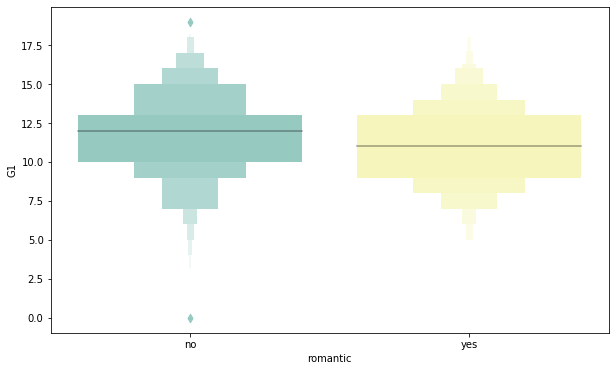

In [48]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="romantic", y="G1", 
                 data=train, palette="Set3")

In [103]:
roman = train[["G1", "romantic","age", "Pstatus", "Medu", "Fedu", "traveltime", "studytime", 
               "failures", "internet", "famrel",
               "freetime", "goout"]]
roman = roman.drop(roman[roman["G1"]<4].index)
roman.head(6
          )


,G1,romantic,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,internet,famrel,freetime,goout
1,9,no,17,T,1,1,1,2,0,yes,5,3,3
2,12,no,15,T,1,1,1,2,0,yes,4,3,2
3,14,yes,15,T,4,2,1,3,0,yes,3,2,2
4,11,no,16,T,3,3,1,2,0,no,4,3,2
5,12,no,16,T,4,3,1,2,0,yes,5,4,2
6,13,no,16,T,2,2,1,2,0,yes,4,4,4


In [90]:
roman.dtypes

G1             int64
romantic      object
age            int64
Pstatus       object
Medu           int64
Fedu           int64
traveltime     int64
studytime      int64
failures       int64
internet      object
famrel         int64
freetime       int64
goout          int64
dtype: object

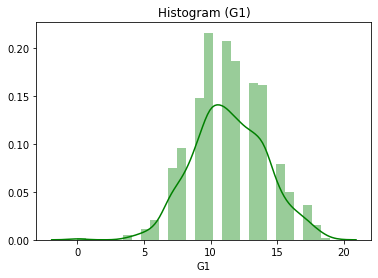

In [50]:
y = train['G1']
plt.figure(3); plt.title('Histogram (G1)')
sns.distplot(y, kde=True, hist = True, color = 'green')

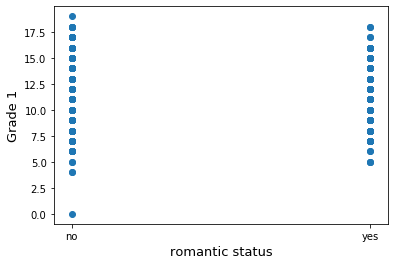

In [51]:
fig, ax = plt.subplots()
ax.scatter(x = roman['romantic'], y = train['G1'])
plt.ylabel('Grade 1', fontsize=13)
plt.xlabel('romantic status', fontsize=13)
plt.show()


 mu = 11.40 and sigma = 2.74



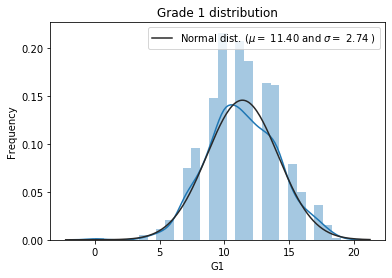

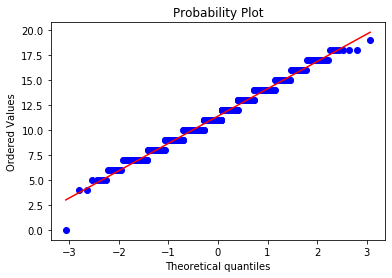

In [52]:
sns.distplot(train['G1'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['G1'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Grade 1 distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['G1'], plot=plt)
plt.show()

In [54]:
train = train.drop(train[train["G1"]<4].index)


 mu = 11.42 and sigma = 2.71



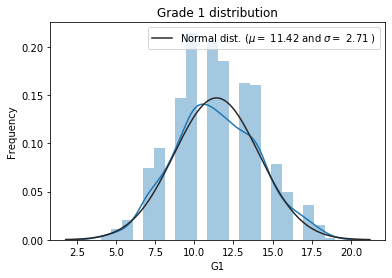

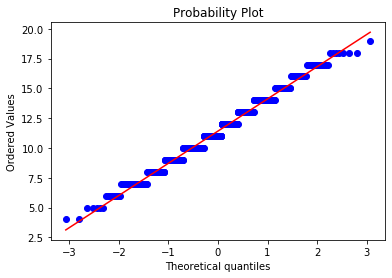

In [56]:
sns.distplot(train['G1'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['G1'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Grade 1 distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['G1'], plot=plt)
plt.show()

In [64]:
train.sort_values(by = ['G1']).head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
567,MS,M,18,R,GT3,T,3,2,services,other,...,2,3,1,2,2,5,0,4,0,0
569,MS,M,18,U,GT3,T,3,3,at_home,at_home,...,4,4,5,1,3,3,9,4,8,8
523,MS,M,18,U,LE3,T,4,4,at_home,health,...,5,5,5,5,5,5,2,5,6,6
603,MS,F,18,R,LE3,A,4,2,teacher,other,...,5,3,1,1,1,5,0,5,0,0


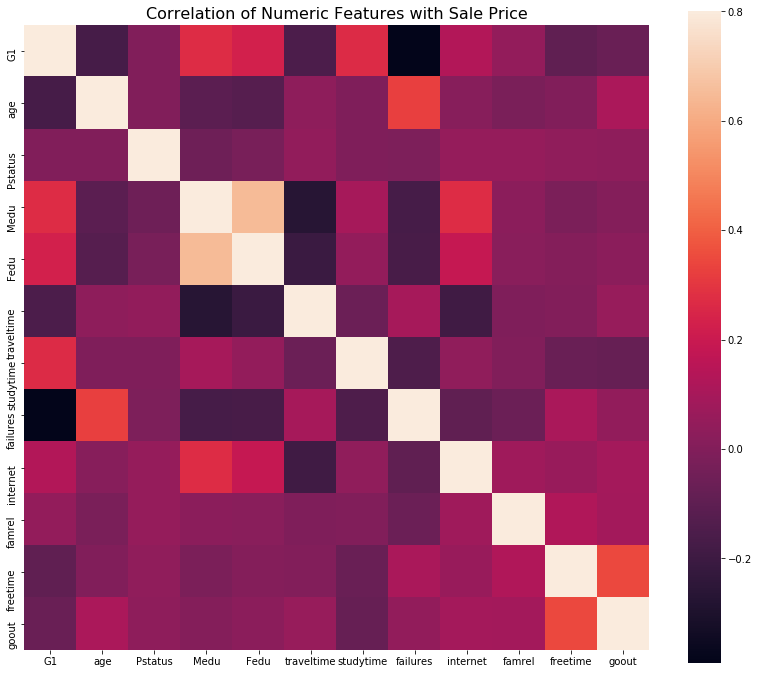

In [105]:
roman2 = roman
#roman2['romantic'] = roman2['romantic'].map({'yes': 1, 'no': 0})
roman2['internet'] = roman2['internet'].map({'yes': 1, 'no': 0})
roman2['Pstatus'] = roman2['Pstatus'].map({'T': 1, 'A': 0})
correlation = roman2.corr()
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

In [106]:
roman.head(6)

,G1,romantic,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,internet,famrel,freetime,goout
1,9,no,17,1,1,1,1,2,0,1,5,3,3
2,12,no,15,1,1,1,1,2,0,1,4,3,2
3,14,yes,15,1,4,2,1,3,0,1,3,2,2
4,11,no,16,1,3,3,1,2,0,0,4,3,2
5,12,no,16,1,4,3,1,2,0,1,5,4,2
6,13,no,16,1,2,2,1,2,0,1,4,4,4


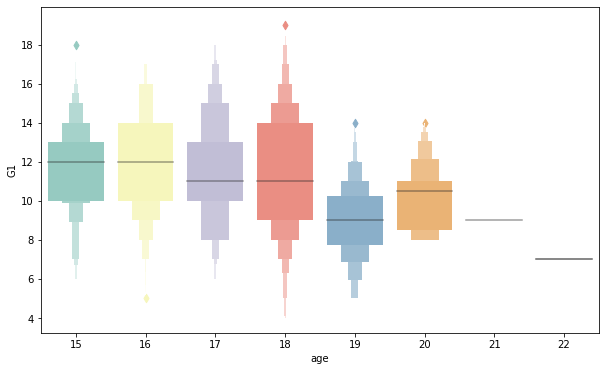

In [81]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="age", y="G1", 
                 data=roman, palette="Set3")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


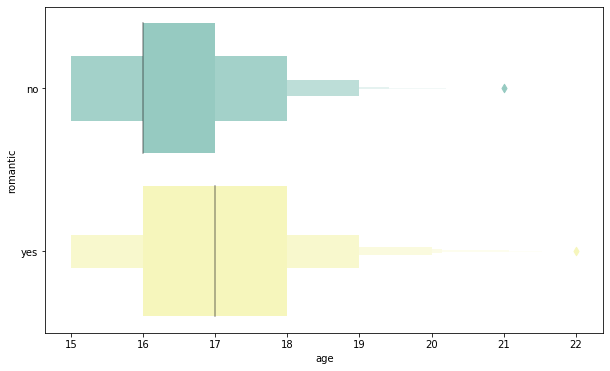

In [83]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="age", y="romantic", 
                   
                 data=roman, palette="Set3")

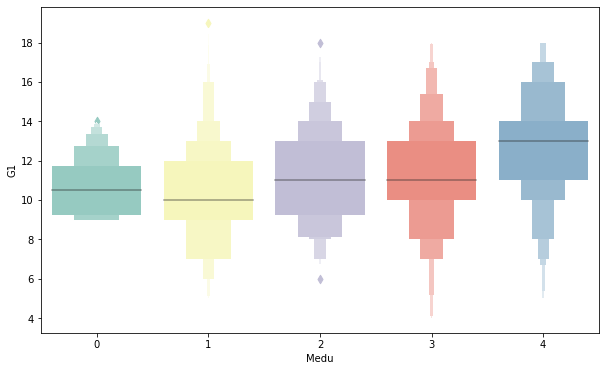

In [85]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="Medu", y="G1", 
                 data=roman, palette="Set3")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


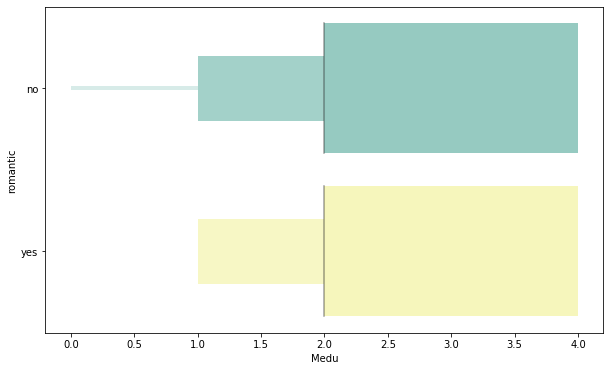

In [86]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="Medu", y="romantic", 
                 data=roman, palette="Set3")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


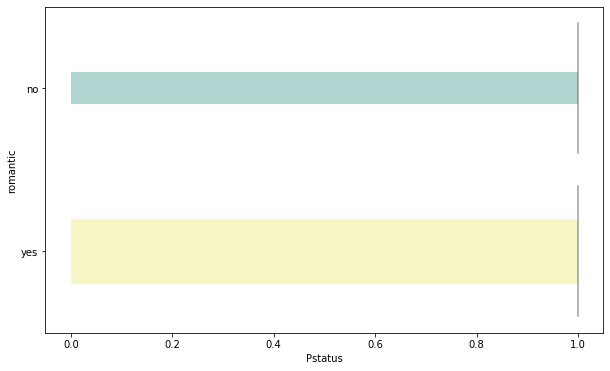

In [107]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="Pstatus", y="romantic", 
                 data=roman, palette="Set3")

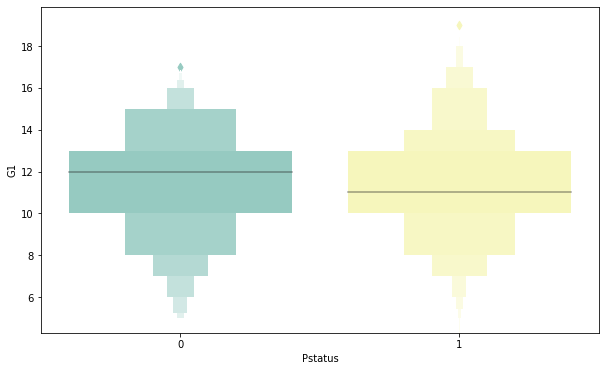

In [109]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="Pstatus", y="G1", 
                 data=roman, palette="Set3")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


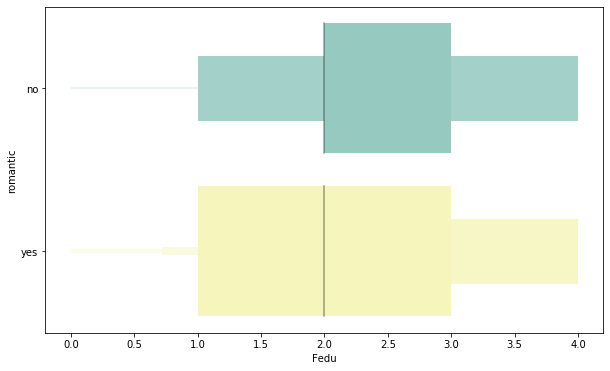

In [110]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="Fedu", y="romantic", 
                 data=roman, palette="Set3")

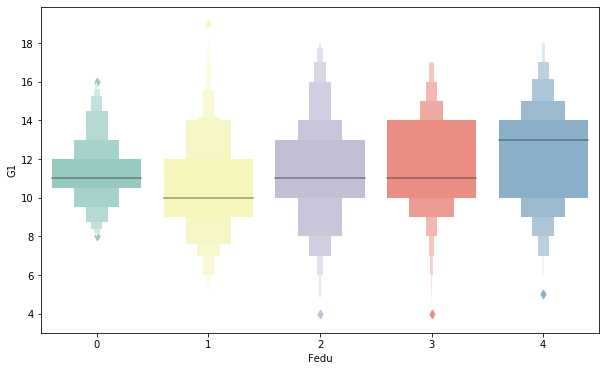

In [113]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="Fedu", y="G1", 
                 data=roman, palette="Set3")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


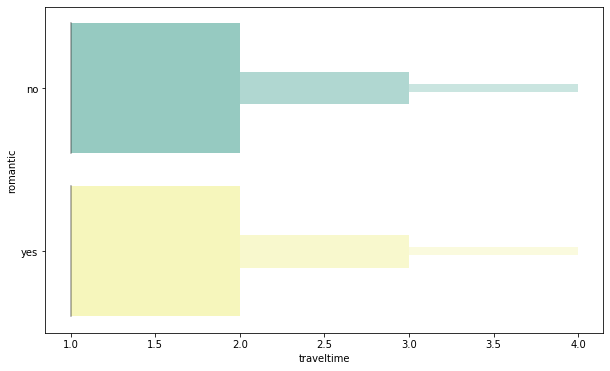

In [115]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="traveltime", y="romantic", 
                 data=roman, palette="Set3")

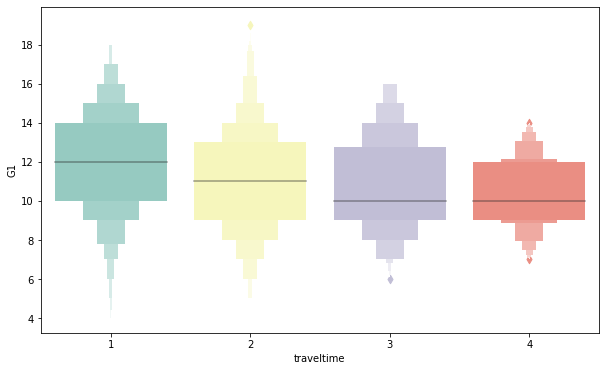

In [116]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="traveltime", y="G1", 
                 data=roman, palette="Set3")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


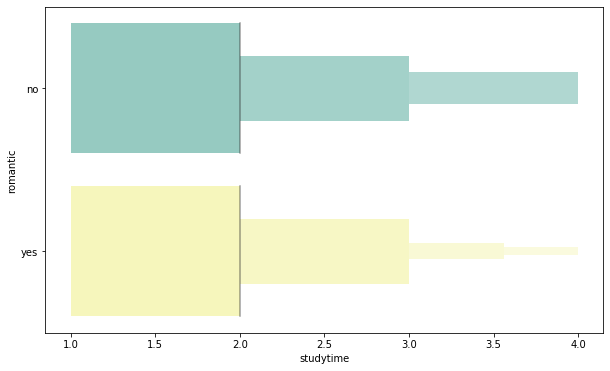

In [117]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="studytime", y="romantic", 
                 data=roman, palette="Set3")

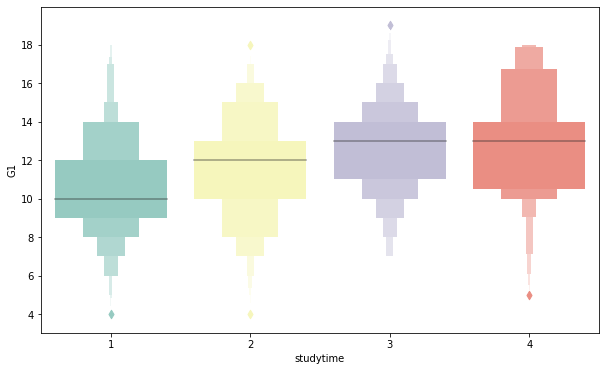

In [118]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="studytime", y="G1", 
                 data=roman, palette="Set3")

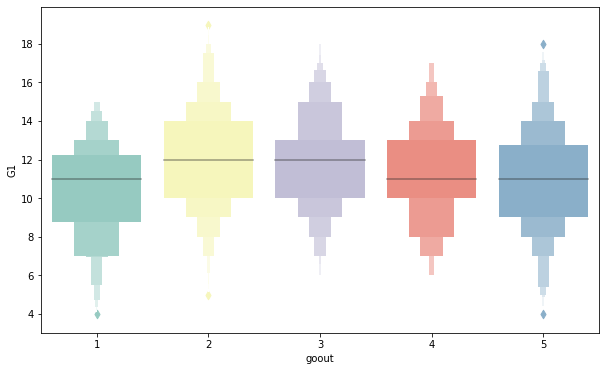

In [119]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="goout", y="G1", 
                 data=roman, palette="Set3")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


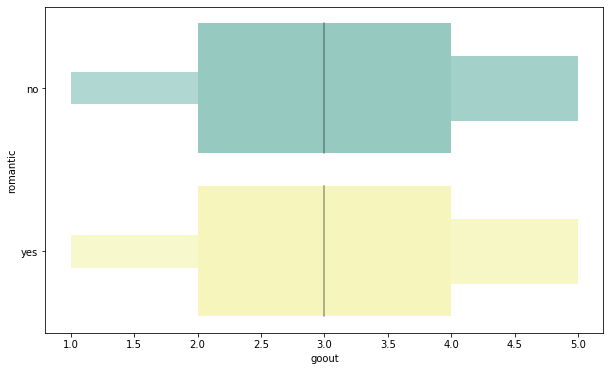

In [121]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="goout", y="romantic", 
                 data=roman, palette="Set3")

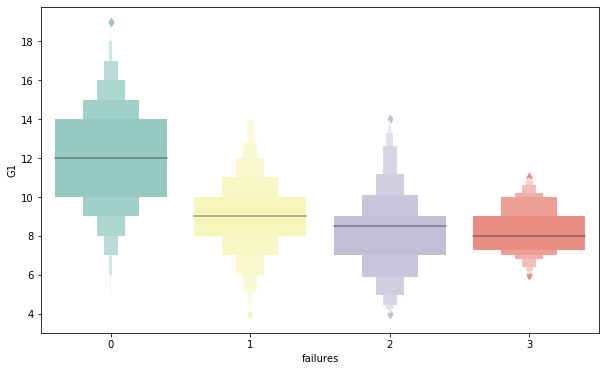

In [122]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="failures", y="G1", 
                 data=roman, palette="Set3")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


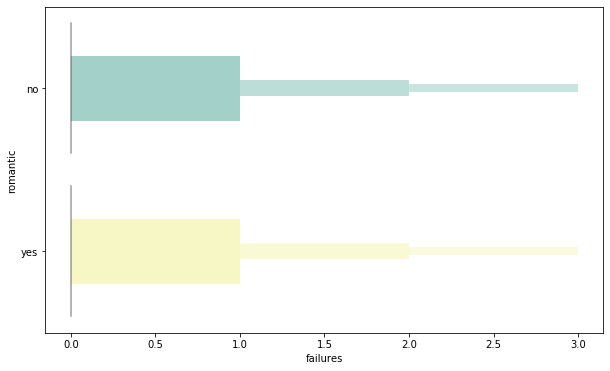

In [123]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="failures", y="romantic", 
                 data=roman, palette="Set3")

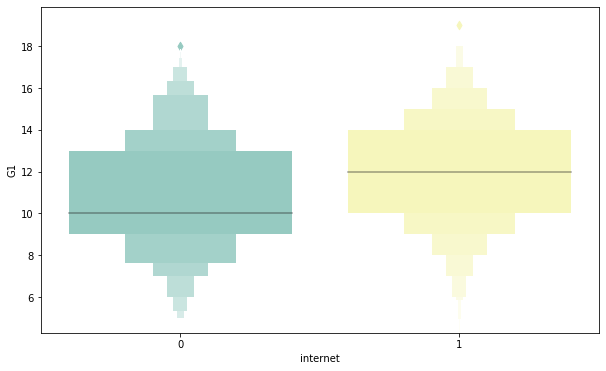

In [124]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="internet", y="G1", 
                 data=roman, palette="Set3")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


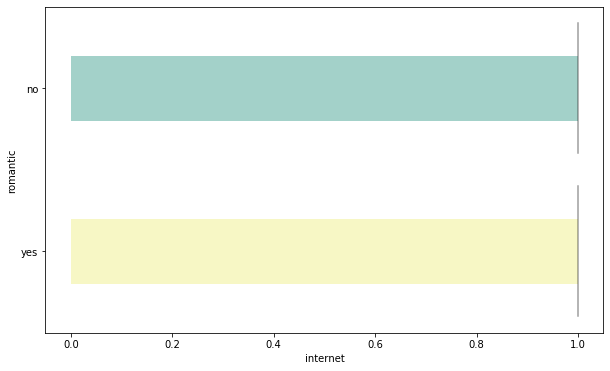

In [125]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="internet", y="romantic", 
                 data=roman, palette="Set3")

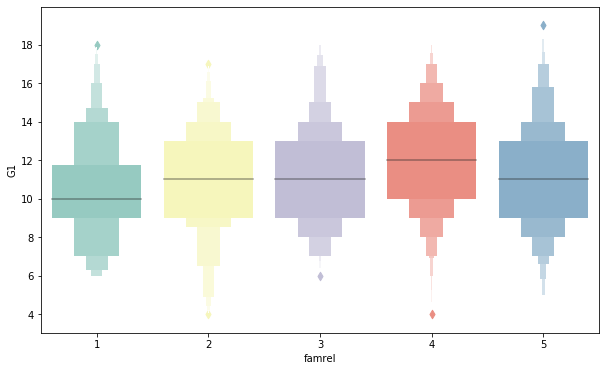

In [126]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="famrel", y="G1", 
                 data=roman, palette="Set3")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


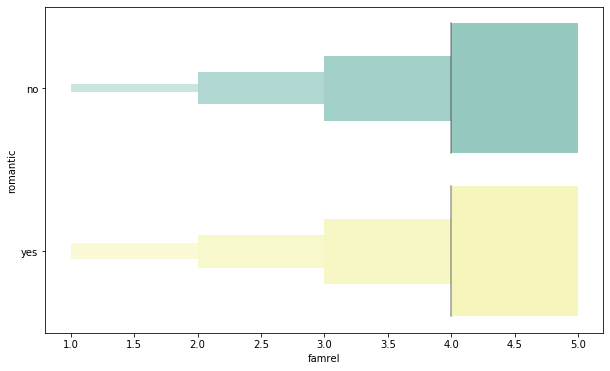

In [127]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="famrel", y="romantic", 
                 data=roman, palette="Set3")

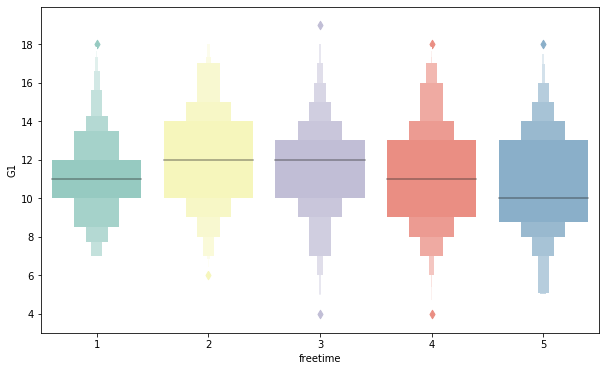

In [128]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="freetime", y="G1", 
                 data=roman, palette="Set3")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


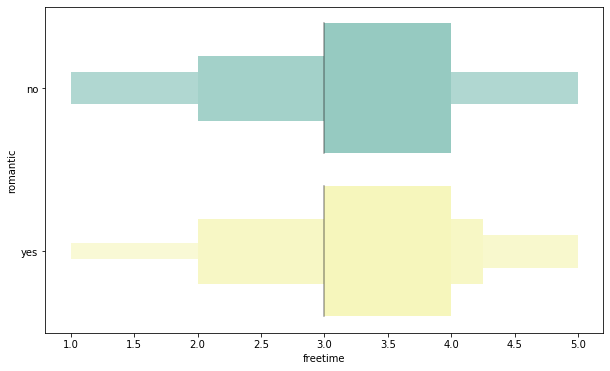

In [129]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="freetime", y="romantic", 
                 data=roman, palette="Set3")


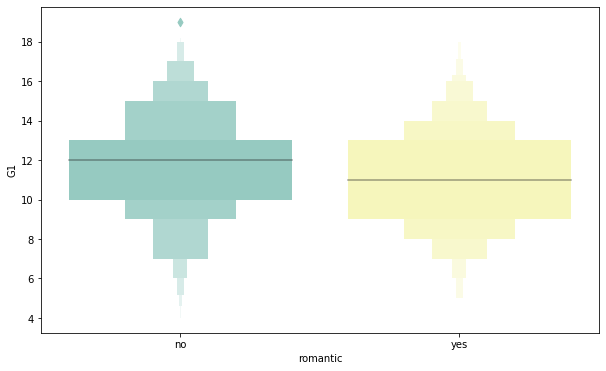

In [133]:


plt.figure(figsize=(10,6))
ax = sns.boxenplot(x="romantic", y="G1", 
                 data=roman, palette="Set3")


In [135]:

import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from D:\program\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\n56vv\AppData\Local\Temp\tmpqd8d238_
  JVM stdout: C:\Users\n56vv\AppData\Local\Temp\tmpqd8d238_\h2o_n56vv_started_from_python.out
  JVM stderr: C:\Users\n56vv\AppData\Local\Temp\tmpqd8d238_\h2o_n56vv_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,07 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,2 months and 27 days
H2O cluster name:,H2O_from_python_n56vv_ebbhfc
H2O cluster total nodes:,1
H2O cluster free memory:,1.754 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [140]:
train = pd.read_csv('roman_num.csv')
h2o_frame = h2o.H2OFrame(train)
n = 7
target = 'G1'
top6_numeric = correlation.nlargest(n,'G1')['G1'].index
list_top6numeric = list(top6_numeric)
print(list_top6numeric)


Parse progress: |█████████████████████████████████████████████████████████| 100%
['G1', 'Medu', 'studytime', 'Fedu', 'internet', 'famrel', 'Pstatus']


In [141]:
list_top6numeric = list_top6numeric[1:]
print(list_top6numeric)

['Medu', 'studytime', 'Fedu', 'internet', 'famrel', 'Pstatus']


In [142]:
train_df, valid_df = h2o_frame.split_frame(
    ratios=[0.7], 
    seed=1234, 
    destination_frames=['train.hex','valid.hex']
)

In [144]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
glm_model_top6numeric = H2OGeneralizedLinearEstimator(model_id='glm_fit_top6numeric')
glm_model_top6numeric.train(list_top6numeric, target, training_frame = train_df, validation_frame = valid_df)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [145]:
glm_model_top6numeric

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_fit_top6numeric


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,"Elastic Net (alpha = 0.5, lambda = 0.001482 )",6,6,1,train.hex




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 6.102252077984702
RMSE: 2.470273684834274
MAE: 1.981569434939313
RMSLE: 0.21158916005049422
R^2: 0.13609991997754534
Mean Residual Deviance: 6.102252077984702
Null degrees of freedom: 465
Residual degrees of freedom: 459
Null deviance: 3291.6416309012884
Residual deviance: 2843.6494683408714
AIC: 2181.2852925556863

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 6.90433250521072
RMSE: 2.6276096561724533
MAE: 2.1214205545463476
RMSLE: 0.2245392352291545
R^2: 0.12457995405615518
Mean Residual Deviance: 6.90433250521072
Null degrees of freedom: 181
Residual degrees of freedom: 175
Null deviance: 1472.1871741973507
Residual deviance: 1256.588515948351
AIC: 884.144764809535

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-05-03 00:55:49,0.000 sec,0,3291.641631,7.063609


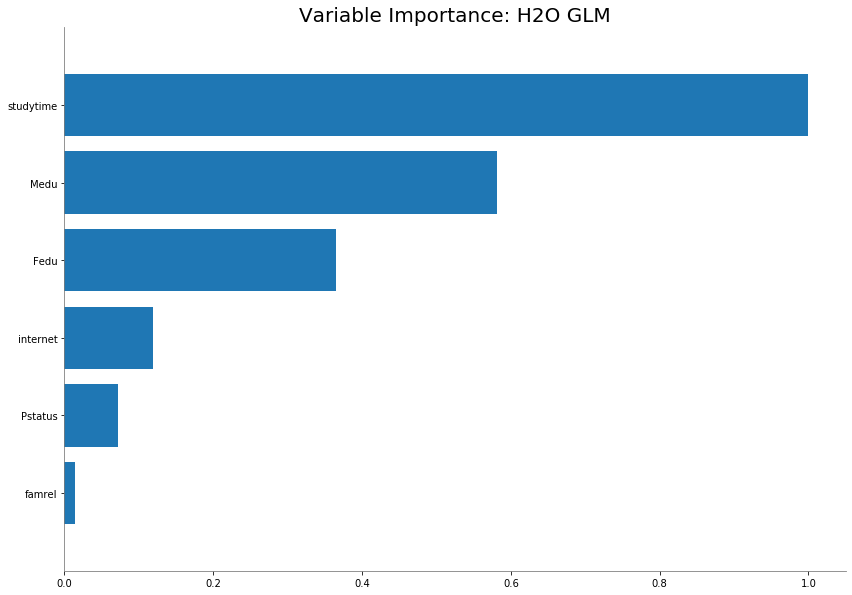

In [146]:
glm_model_top6numeric.varimp_plot()

In [148]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
#Data is used the same as LGB
X = train.drop(columns=['G1']) 
y = train['G1']
X.head()
cb_model = CatBoostRegressor(iterations=500,
                             learning_rate=0.05,
                             depth=10,
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)
cb_model.fit(X, y)
r2_score(cb_model.predict(X), y)

0:	learn: 2.6766316	total: 18.9ms	remaining: 9.41s
50:	learn: 1.7505631	total: 766ms	remaining: 6.74s
100:	learn: 1.2618823	total: 1.77s	remaining: 7.01s
150:	learn: 0.9081374	total: 2.81s	remaining: 6.51s
200:	learn: 0.6444702	total: 3.68s	remaining: 5.48s
250:	learn: 0.4619749	total: 4.64s	remaining: 4.6s
300:	learn: 0.3346721	total: 5.52s	remaining: 3.65s
350:	learn: 0.2464395	total: 6.47s	remaining: 2.75s
400:	learn: 0.1821107	total: 7.33s	remaining: 1.81s
450:	learn: 0.1379722	total: 8.33s	remaining: 905ms
499:	learn: 0.1039932	total: 9.53s	remaining: 0us


0.9984617220876512